# Assignment 4
<br> <div style="text-align:right">Janice Luong <br> STA 141B <br> Feb 15, 2017</div>

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

In [134]:
import requests
import requests_cache
import pandas as pd
import json

# Set up a cache for requests.
requests_cache.install_cache("cache")

# Makes a search request
def ndb_search_url(terms, verbose = False):
    url = "https://api.nal.usda.gov/ndb/search"
    
    params = {"q" : terms
              ,"format" : "json"
              ,"sort" : "n"
              ,"max" : "50"
              ,"offset" : "0"
              ,"api_key" : "YOUR KEY HERE"}
    
    response = requests.get(url, params)
    response.raise_for_status() # check for errors
    if verbose:
        print response.url
    return response.json() # parse JSON

The function above takes in a search term. The function below will grab the items of the result.

In [135]:
# Uses the search requestion function above and takes in one parameter, which is the search term
# Returns the search result items as a list (for 0 items, it returns a empty list)
def ndb_search(food):
    items = ndb_search_url(food)
    if "errors" in items:
        return []
    else:
        return items["list"]["item"]

The function above takes in a search argument and returns the search result items as a list and if there are 0 items, then the function will return an empty list.

In [136]:
# Takes in an argument for search
ndb_search("quail eggs")

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 2},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 4},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 5}]

In [137]:
# Example of returning empty list 
ndb_search("but")

[]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

__Discuss your strategy in a short paragraph.__

I first grabbed all the names in the fresh.csv file and added the word " raw" (space included) after the food name because this will help filter out any foods, where the "name" does not include raw since that is one of the requirements. I added a " " before raw or else the words would not be seperated. After getting all the items for each food, i filtered out any rows that did not contain "SR" under the "ds" column. Finally, I filtered the list even further by grabbing the shortest name value for each food. I did this because food with the shortest "name" column are generally the most generic version of the food. I did some filterings using string matching to eliminate words such as "peeled" and other words inbetween the food name and raw. Although I was not able to grab all the foods (missing 5, see below), I was able to grab the most generic ones for 43 foods.

In [138]:
fresh_data = pd.read_csv("fresh.csv")
# Get only the column with all the food names and add raw at the end
fresh_data = fresh_data.iloc[:,(5)] + " raw"
# Replace all the underscores with a space because api.nal.usda.gov/ndb/search returns the names without an underscore 
fresh_data = [food.replace("_", " ") for food in fresh_data]

I grabbed the last (6th) column in the fresh.csv spreadsheet because that is where all the food names are. After the food name, I added the word " raw", so later when I pass the food name as a search term, it will filter out any foods that does not have the word " raw" under the name column.

In [139]:
# Create an empty data frame so we can store all results from ndb_search()
ndb_no = pd.DataFrame()

# For every food in fresh_data, store the data into ndb_no data frame
for x in fresh_data:    
    data = ndb_search(x)
    # For the first entry, the var ndb_no will be empty, so if it is empty, put the first search results into ndb_no
    if len(data) > 0: 
        if ndb_no.empty:
            ndb_no = pd.DataFrame(data)
        # The rest of the search results will be added to the bottom of the ndb_no data frame    
        else:
             ndb_no = pd.concat([pd.DataFrame(data), ndb_no])

# Grab only the rows where the column "ds" contains "SR" because we do not want BL (Branded foods)
ndb_no = ndb_no[ndb_no["ds"].str.contains("SR", case = False)]
print ndb_no.shape
ndb_no = ndb_no.reset_index()
ndb_no.head()

(277, 5)


,index,ds,group,name,ndbno,offset
0,8,SR,Baby Foods,"Babyfood, corn and sweet potatoes, strained",03934,8
1,20,SR,Beef Products,"Beef, cured, corned beef, brisket, raw",13346,20
2,42,SR,Fruits and Fruit Juices,"Cherries, sweet, raw",09070,42
3,47,SR,Vegetables and Vegetable Products,"Corn, sweet, white, canned, cream style, no sa...",11907,47
4,48,SR,Vegetables and Vegetable Products,"Corn, sweet, white, canned, cream style, regul...",11906,48


After passing in all the food names as a search parameter, I filtered the list by selected only the rows where the column "ds" contains "SR" (case in sentitive) because the column "ds" has two values,  'Branded Food Products' or 'Standard Reference'. In our case, we only want products that are unbranded, which is known as 'Standard Reference' according to USDA.

In [140]:
# Remove peeled and chinese because they were causing me to get specific types of a food, not a generalized one
ndb_no = ndb_no[(~ndb_no["name"].str.contains(", peeled")) & (~ndb_no["name"].str.contains(", chinese "))]
ndb_no.shape

(271, 6)

I removed any "name" that had the word peeled or chinese in it because those were giving a more specific type for certain foods. 

Since in the column "food" in fresh.csv, the food name did not contain anything about peeled or un-peeled or the color of the food, for cucumbers and cabbage, I grabbed the most generic one. Also, when searching up foods with the word "peeled" or "un-peeled" their nutrition values, such as water content, protein and energy were extremely similar; therefore, it was negligible. I also removed the rows with word "chinese" from the name column because that is a specific type of cabbage. After removing the rows with word "chinese", I was able to get a common/generic version of cabbage that is also raw, which is what we want. 

In [141]:
# Make a copy to make sure I do not tamper with the original
ndb_no_copy = ndb_no.copy()

In [142]:
# from IPython.core.display import display, HTML
# Create an empty dataframe to store all the foods with the shortest name descrition 
results = pd.DataFrame()
# Create an empty list to store in all the foods that I missed because it was not in ndb_no_copy
missed_foods = []

# Filters out rows in ndb_no_copy that does not meet the criterias specified inside the for-loop
for food in fresh_data: 
    single_food = ndb_no_copy.copy()   
    
    for word in food.split(" "):
        # Remove the "s" from end of the food name to so it can look through the name col for the food plural or not
        single_food = single_food[single_food['name'].str.contains(word.rstrip("s"), case = False)]
                                 
    # Create a new col so I know the name of the food from fresh.csv, which is why I drop the " raw"
    single_food["original_name"] = food.replace(" raw", "")
    
    # Start from first row, because that is the row we will use to start the comparison
    selected_iloc = 0    
    
    # Loops that grabs the shortest name value, start from 1 because we don't compare the first row (0) to anything
    for row in range(1, single_food.shape[0]): # [rows, columns]
        # Grab the shortest food name and set that row to selected_iloc and keep on comparing and replacing selected_ilock
        # with the shortest name value
        # single_food.iloc[selected_iloc, 2] --> [selected row, col 2], if it is longer than the current [row, col2]
        # then set var row to be the new selected_iloc and compare again, until you get the shortest name value for that food
        if len(single_food.iloc[row, 2]) < len(single_food.iloc[selected_iloc, 2]):
            selected_iloc = row
    
    # If there is no food that matches the criteria, then add it to a list of missed foods so I know which ones I missed       
    if single_food.shape[0] == 0:
        missed_foods.append(food)
        continue
        
    # Store the names with shortest values into the results dataframe I made earlier
    results = pd.concat([results, single_food.iloc[[selected_iloc]]])

print "all done"
print "missed the following foods: " + str(missed_foods)

all done
missed the following foods: ['mangoes raw', 'turnip greens raw', 'collard greens raw', 'red peppers raw', 'sweet potatoes raw', 'corn sweet raw']


My final filter is where I filtered each food by grabbing the shortest column "name" value because I noticed that the shorter the name value, the more generic the food is. This filter firsts splits ups the food name by spaces and it drops the "s" from every word for that food (a food can have up to 3 words, eg: trunip, greens, raw). 

Then the loop, from a temperary list, picks out rows that first contain eg. trunip, then from the trunip list it picks out rows that contain the word greens, then finally from the list of greens it grabs the rows with the word raw. (eg. from a group of people you pick out all the people with black hair, then from the black hair list you pick out people with green shirts). 

Then finally from that list, the last inner for loop compares each row in the list and grabs the row with the shortest "name" value.

I also made a list of foods that I missed. I likely missed the foods because they may not have an entry where it contained the word " raw" along with the food. For example, I found "collard greens", which is without the word raw. Although I was not able to get all the food's ndbno, my filter does a pretty good job of grabbing the most generic version of the food (even Kiwifruit).

In [143]:
results.shape

(43, 7)

In [144]:
# Drop the duplicates of cabbage and cucumbers
results = results.drop_duplicates("name")
results

,index,ds,group,name,ndbno,offset,original_name
276,4,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4,watermelon
275,0,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0,cantaloupe
265,11,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,11,tangerines
272,1,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,1,strawberries
267,1,SR,Fruits and Fruit Juices,"Carissa, (natal-plum), raw",09061,1,plums
258,3,SR,Fruits and Fruit Juices,"Orange juice, raw",09206,3,oranges
256,3,SR,Fruits and Fruit Juices,"Raspberries, raw",09302,3,raspberries
255,1,SR,Fruits and Fruit Juices,"Pomegranates, raw",09286,1,pomegranate
252,0,SR,Fruits and Fruit Juices,"Pineapple, raw, all varieties",09266,0,pineapple
251,0,SR,Fruits and Fruit Juices,"Apricots, raw",09021,0,apricots


Out of 49 foods, I was able to get an ndbno for 43 foods. I made sure " raw" was a priority in the name because when we buy foods at a grocery store, such as fruits and veggies, they are usually raw. I also selected only items that were unbranded because generally when we purchase fruits and veggies, we do not care much about what "brand" it.

I ignored whether or not the foods were "peeled" or "unpeeled" or different colored caggage (red or green) because their nutrition values, such as water content, protein and energy were extremely similar. The difference was only about ~2 grams, so it would not affect my analysis of which foods contain the most nutrient for its price and yield. 

I then dropped any duplicates because there was two cabbage and cucumbers.

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

In [145]:
# This function requests a basic food report and returns the list of nutrients for the food
def ndb_report(ndbNum, verbose = False):
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    response = requests.get(url, params = {
            "ndbno" : ndbNum,
            "format" : "json",
            "type" : "b",
            "api_key" : "YOUR KEY HERE"
        })
    response.raise_for_status() # check for errors
    if verbose:
        print response.url
    return response.json()["foods"][0]["food"]["nutrients"] # parse JSON

The function above takes in a NDB number and requests a basic food report. It then returns the list of nutrients for the food. Below is an example of how the function returns the food report results.

In [146]:
# Example of the function accepting the NDB number and returning the list of nutrients for the food
ndb_report("09050")

[{u'group': u'Proximates',
  u'measures': [{u'eqv': 148.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'124.63'},
   {u'eqv': 68.0,
    u'eunit': u'g',
    u'label': u'berries',
    u'qty': 50.0,
    u'value': u'57.26'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'84.21'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 148.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'84'},
   {u'eqv': 68.0,
    u'eunit': u'g',
    u'label': u'berries',
    u'qty': 50.0,
    u'value': u'39'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'57'},
 {u'group': u'Proximates',
  u'measures': [{u'eqv': 148.0,
    u'eunit': u'g',
    u'label': u'cup',
    u'qty': 1.0,
    u'value': u'1.10'},
   {u'eqv': 68.0,
    u'eunit': u'g',
    u'label': u'berries',
    u'qty': 50.0,
    u'value': u'0.50'}],
  u'name': u'Protein',
  u'nutrient_id': u'203',
  u'unit': u'g',
  u'value': u

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [147]:
#ndb_report("11233")[2]["measures"][0]["eqv"]

In [148]:
from IPython.core.display import display, HTML
# import warnings
# warnings.filterwarnings('ignore')

results.reset_index(drop = True, inplace = True)

num_col = 0

# Get the kilocalories for each food
for index, row in results.iterrows():
    # Get the nutrient info for a partocular food given the ndb number
    nutrient = ndb_report(row["ndbno"])
    # For each nutrient, get the values of Energy and divide it by the yield (food quantity)
    nutri_index = 0
    for nutrient_data in nutrient:
        # Only grab the first 5 nutrients
        if nutri_index == 5:
            break
        nutri_index += 1
        # Select the value "name"
        nutrient_name = nutrient_data["name"]
        nutrient_column_name = nutrient_name + "_per_gram"
        if nutrient_column_name not in results:
            results[nutrient_column_name] = 0.0
        # In the dict, select measures, and within the measures list, get the first item
        measures = nutrient_data["measures"][0]
        # Within the dict, select "eqv" to get the equivlent value of the food in grams
        food_qty = measures["eqv"]
        nutrient_qty = float(measures["value"])
        # Get kcals/gram
        nutrient_amt = nutrient_qty/food_qty
        results[nutrient_column_name][index] = nutrient_amt 

results.head()

,index,ds,group,name,ndbno,offset,original_name,Water_per_gram,Energy_per_gram,Protein_per_gram,Total lipid (fat)_per_gram,"Carbohydrate, by difference_per_gram"
0,4,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4,watermelon,0.914481,0.298701,0.006104,0.001494,0.075519
1,0,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0,cantaloupe,0.901525,0.338983,0.008418,0.001921,0.081582
2,11,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,11,tangerines,0.851692,0.528205,0.008103,0.003077,0.133385
3,1,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,1,strawberries,0.909474,0.322368,0.006711,0.003026,0.076776
4,1,SR,Fruits and Fruit Juices,"Carissa, (natal-plum), raw",09061,1,plums,0.841667,0.620000,0.005000,0.013000,0.136333


The function above grabs just the first 5 entries for each food by selecting the nutrient name. Then within the elected nutrient, then within that dictionary, it grabs measures, and within the list measures it grabs "eqv", which is the amount of grams. At the same time, it grabs "values" from the list measures. For example, doing $\frac{\text{value}}{\text{eqv}}$ gives us $\frac{\text{kcal}}{\text{grams}}$.

I only grabed the first 5 because anything after the 5th "name", are nutrition values such as sugar and vitamines, which generally do not tell us much about how much we are getting out of the product if we are buying it because sugar does not make us full and usually the vitamins vary very differently from product to product. For example, we know bananas are known for being high in Potassium, so it would not be helpful to be comparing the amount of Potassium for the foods when we already know bananas contain a lot of it.

Also, anything after the column "Carbohydrate, by difference_per_gram", some foods begin to have missing values. This means not all food will have a value, and we would start to have a lot of 0's for a lot of the nutrition value, which is not a helpful comparison to be comparing 0's to each other.

In [149]:
fresh_data = pd.read_csv("fresh.csv")
final_data = results.copy()

# Reset the index because some foods have the same index and will cause the for loop where it takes
# in an index to replace multiple foods data
# with another food's data that has the same index
final_data.reset_index(drop = True, inplace = True)

cols = ["price_per_lb", "yield", "lb_per_cup", "price_per_cup"]

# for all the columns in col, make them a float, since in fresh.csv it is a float
for name in cols:
    final_data[name] = 0.0


for index, row in final_data.iterrows():
    single_food = fresh_data[fresh_data['food'] == row["original_name"].replace(" ", "_")]
    # print row["original_name"] + str(single_food.shape[0])
    # print single_food.head()
    
    for name in cols:
        # print "[ "+ str(name) +"][ "+ str(index) +"] = " + str(single_food[name].iloc[0])
        final_data[name][index] = single_food[name].iloc[0]

In the cell above is where I start to form my final dataframe. I grabbed several rows from the fresh.csv, which I thought would be helpful in creating meaningful plots to show which foods provides the best combination of price, yield and nutrition. for each column that I wanted from fresh.cvs, I looped through and changed all the food names back to it's original name, which contained an underscore instead of a space. Then I grabbed the 4 columns (variable cols) and placed them into my dataframe final_data.

In [150]:
final_data["kcal_per_price"] = 0.0      
final_data["kcal_per_lb"] = 0.0

final_data["protein_per_price"] = 0.0      
final_data["protein_per_lb"] = 0.0

final_data["carbohs_per_price"] = 0.0      
final_data["carbohs_per_lb"] = 0.0

# Energy Content +
# price_per_lb -
# yield +
GRAMS_TO_LB = 453.592

# Calculates kcal per dollar multiplied by the eible amount of the food purchased
for index, row in final_data.iterrows():
    kcal_per_lb = row["Energy_per_gram"] * GRAMS_TO_LB
    # (Energy Density) * yield / price_per_lb
    # (kcals / lb) * (yield) / ($ / lb)
    # (kcals / lb) * (yield) * (lb / $)
    # (kcals / lb) * (lb / $) * (yield)
    # (kcals / $) * (yield)
    energy_value = (kcal_per_lb * row["yield"]) / row["price_per_lb"]
    final_data["kcal_per_price"][index] = energy_value
    final_data["kcal_per_lb"][index] = kcal_per_lb
    
for index, row in final_data.iterrows():
    protein_per_lb = row["Protein_per_gram"] * GRAMS_TO_LB
    # (protein Density) * yield / price_per_lb
    # (grams / lb) * (yield) / ($ / lb)
    # (grams / lb) * (yield) * (lb / $)
    # (grams / lb) * (lb / $) * (yield)
    # (grams / $) * (yield)
    protein_value = (protein_per_lb * row["yield"]) / row["price_per_lb"]
    final_data["protein_per_price"][index] = protein_value
    final_data["protein_per_lb"][index] = protein_per_lb

for index, row in final_data.iterrows():
    carbohs_per_lb = row["Carbohydrate, by difference_per_gram"] * GRAMS_TO_LB
    carbohs_value = (protein_per_lb * row["yield"]) / row["price_per_lb"]
    final_data["carbohs_per_price"][index] = carbohs_value
    final_data["carbohs_per_lb"][index] = carbohs_per_lb
    
display(HTML(final_data.head().to_html()))

,index,ds,group,name,ndbno,offset,original_name,Water_per_gram,Energy_per_gram,Protein_per_gram,Total lipid (fat)_per_gram,"Carbohydrate, by difference_per_gram",price_per_lb,yield,lb_per_cup,price_per_cup,kcal_per_price,kcal_per_lb,protein_per_price,protein_per_lb,carbohs_per_price,carbohs_per_lb
0,4,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4,watermelon,0.914481,0.298701,0.006104,0.001494,0.075519,0.333412,0.52,0.330693,0.212033,211.312198,135.488519,4.318119,2.768678,23.875982,34.255032
1,0,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0,cantaloupe,0.901525,0.338983,0.008418,0.001921,0.081582,0.535874,0.51,0.374786,0.393800,146.335954,153.760000,3.634010,3.818373,14.569573,37.004907
2,11,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,11,tangerines,0.851692,0.528205,0.008103,0.003077,0.133385,1.377962,0.74,0.407855,0.759471,128.665620,239.589621,1.973706,3.675258,8.221171,60.502194
3,1,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,1,strawberries,0.909474,0.322368,0.006711,0.003026,0.076776,2.358808,0.94,0.319670,0.802171,58.271078,146.223737,1.212990,3.043841,6.100625,34.825123
4,1,SR,Fruits and Fruit Juices,"Carissa, (natal-plum), raw",09061,1,plums,0.841667,0.620000,0.005000,0.013000,0.136333,1.827416,0.94,0.363763,0.707176,144.659681,281.227040,1.166610,2.267960,7.874620,61.839709


I added another column called kcal_per_price because I wanted to see which foods gives the kilocalories for \$1. I did this by eliminating units. I first converted kcals per grams to kcals per lb: $\frac{\text{kcals}}{\text{ grams}} \times \frac{453.592\text{grams}}{\text{ib}} = \frac{\text{kcals}}{\text{lb}}$. Then I converted $\frac{\text{kcals (grams)}}{\text{lb}}$ to kcals per dollar by eliminating units: $\left(\frac{\text{kcals(grams)}}{\text{lb}} \div \frac{\text{\$}}{\text{lb}}\right) = \frac{\text{kcal(grams)}}{\text{lb}}$. Finally I multiplied $\frac{\text{kcal(grams)}}{\text{lb}}$ by yield because I wanted to get the actual amount of kcals I am paying for, which is only the edible parts of the food. 

For example. If I buy a watermelon, only about 50% of the fruit is consumed, everything else will be composted. So I didn't actually pay for $\frac{100\text{kcals}}{\text{lb}}$, I actually only got $\frac{100\text{kcals(grams)}}{\text{lb}} \times 50\% = \frac{50 \text{kcals(grams)}}{\text{lb}}$ (an example, kcals may not be representative of true value).

I applied the same concept to the protein, total lipid and carbohydrates columns.

In [151]:
# Drop columns that I dont need/want anymore so it looks cleaner
final_data.drop(final_data.columns[[0, 7, 8, 9, 10, 11, 14, 15]], 1, inplace = True) # inplace = True so I dont have to rename dataframe
final_data.head()

,ds,group,name,ndbno,offset,original_name,price_per_lb,yield,kcal_per_price,kcal_per_lb,protein_per_price,protein_per_lb,carbohs_per_price,carbohs_per_lb
0,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,4,watermelon,0.333412,0.52,211.312198,135.488519,4.318119,2.768678,23.875982,34.255032
1,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0,cantaloupe,0.535874,0.51,146.335954,153.760000,3.634010,3.818373,14.569573,37.004907
2,SR,Fruits and Fruit Juices,"Tangerines, (mandarin oranges), raw",09218,11,tangerines,1.377962,0.74,128.665620,239.589621,1.973706,3.675258,8.221171,60.502194
3,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,1,strawberries,2.358808,0.94,58.271078,146.223737,1.212990,3.043841,6.100625,34.825123
4,SR,Fruits and Fruit Juices,"Carissa, (natal-plum), raw",09061,1,plums,1.827416,0.94,144.659681,281.227040,1.166610,2.267960,7.874620,61.839709


In [152]:
# final_data.sort_values(by = "kcal_per_price", ascending = False)

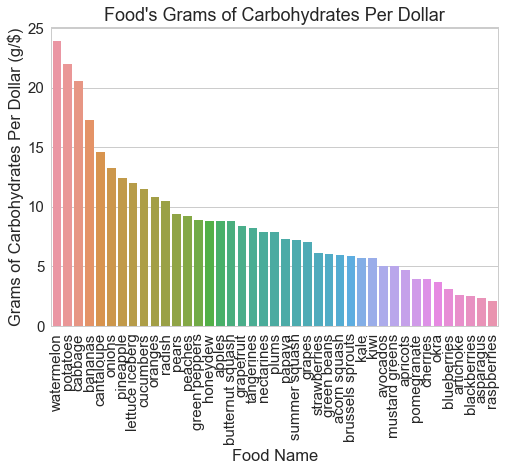

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
sns.set(font_scale = 1.5)

# Make a bar plot of all the fruits, sorting them from most expensive to cheapest in price per kilcals
sns.set_style("whitegrid")
kcal_ordered = sns.barplot(x = "original_name", y = "carbohs_per_price", data = final_data.sort_values(by = "carbohs_per_price", ascending = False))
for item in kcal_ordered.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Food\'s Grams of Carbohydrates Per Dollar')
kcal_ordered.set(ylabel = 'Grams of Carbohydrates Per Dollar (g/$)', xlabel = 'Food Name')
sns.plt.show()

In the plot above, the foods watermelon, potatoes, cabbage and bananas gives the most amount of grams of carbohydrates for \$1.

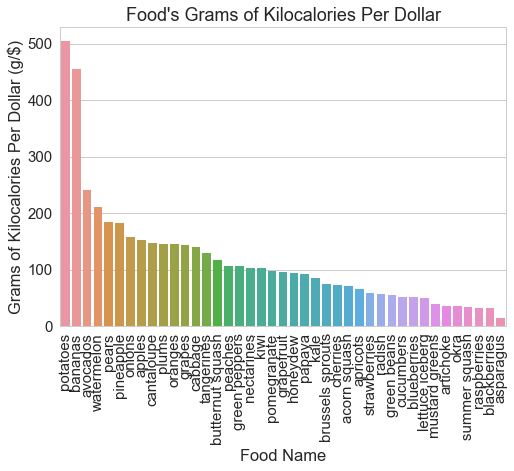

In [154]:
sns.set_style("whitegrid")
kcal_ordered = sns.barplot(x = "original_name", y = "kcal_per_price", data = final_data.sort_values(by = "kcal_per_price", ascending = False))
for item in kcal_ordered.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Food\'s Grams of Kilocalories Per Dollar')
kcal_ordered.set(ylabel = 'Grams of Kilocalories Per Dollar (g/$)', xlabel = 'Food Name')
sns.plt.show()

In the scatter plot above, potatos, bananas, avocadoes and watermelon gives us the most kcal per lbs for a large percentage of yield. Although brussel sprouts gives us the most yield (almost all of it is edible), it gives us very little kilocals per lb.

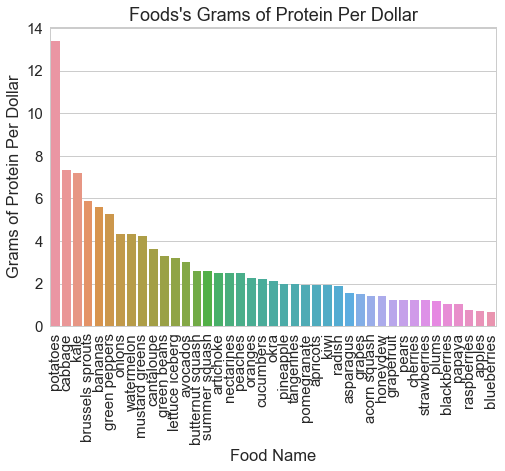

In [157]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(font_scale = 1.5)

# Make a bar plot of all the fruits, sorting them from most expensive to cheapest in price per protein
sns.set_style("whitegrid")
kcal_ordered = sns.barplot(x = "original_name", y = "protein_per_price", data = final_data.sort_values(by = "protein_per_price", ascending = False))
for item in kcal_ordered.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Foods\'s Grams of Protein Per Dollar')
kcal_ordered.set(ylabel = 'Grams of Protein Per Dollar', xlabel = 'Food Name')
sns.plt.show()

In the plot above, the foods that give us the most protein per dollar times the yield amount $\left(\frac{\text{protein}}{\$} \times \text{yield}\right)$, where yield is a percentage (%), are potatoes, cabbage, brussel sprouts, bananas, green peppers, onions, and watermelon.

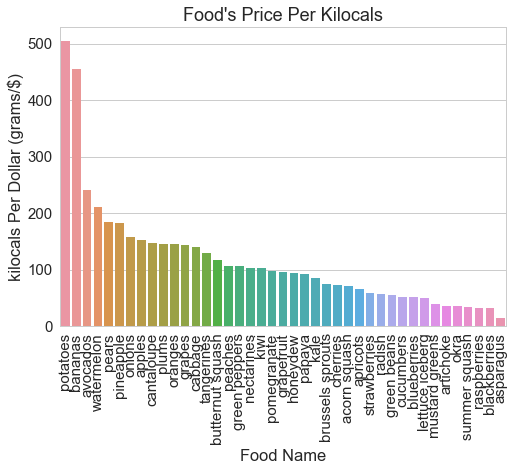

In [156]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.set(font_scale = 1.5)

# Make a bar plot of all the fruits, sorting them from most expensive to cheapest in price per kilcals
sns.set_style("whitegrid")
kcal_ordered = sns.barplot(x = "original_name", y = "kcal_per_price", data = final_data.sort_values(by = "kcal_per_price", ascending = False))
for item in kcal_ordered.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Food\'s Price Per Kilocals')
kcal_ordered.set(ylabel = 'kilocals Per Dollar (grams/$)', xlabel = 'Food Name')
sns.plt.show()

The plot above sorts all the foods from most amount of kilocals per dollar to the least amount of kilocals per dollar. $\frac{\text{kcals}}{\text{lb}}$ takes in account of yield, so it tells us how much we are really paying for when taking in consideration of only the edible parts.

In Assignment 3, I hypothesized that foods with large amount of starch such as potatos and bananas would have the best combination of price, yield, and nutrition because you get a ton of energy (kilocals) for $1 (biggest bang for a buck).

In all the plots, we have seen potatoes, bananas, and watermelon consistantly rank within the top 10 for most kcals protein and carbohydrates per dollar; therefore, foods that gives us the most nutrition for its price and yield are potatoes, bananas, avocadoes, watermelon and pears. 

It we can also see that foods that give us the least amount of nutrition/energy for its price and yield are raspberries, blackberries, asapgus, apples and blueberries. I find this shocking because in Assignment 3, the fruits, espcially the berries, were the most expensive per pound. They're expensive and gives little nutrients. 